In [209]:
import numpy as np
import matplotlib.pyplot as plt
import plotly_express as px
import plotly.graph_objects as go
from scipy.io import wavfile
from scipy.fft import fft, ifft
from tqdm.notebook import tqdm
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import pyaudio, wave
import os
import time as tm

In [210]:
#Paramètres du modèles

nb_harm_considered = 5
n_neigbhors = 4
lst_notes = ['Mi1','Fa1','Fa#1','Sol1','Sol#1','La1','La#1','Si1','Do2','Do#2','Re2','Re#2']

# compréhension des données

[[9.90000000e+01 3.36000000e+02 6.72000000e+02 1.01100000e+03
  1.68200000e+03]
 [3.53411074e+07 3.40220039e+07 2.43813362e+07 1.92976839e+07
  1.20814016e+07]]


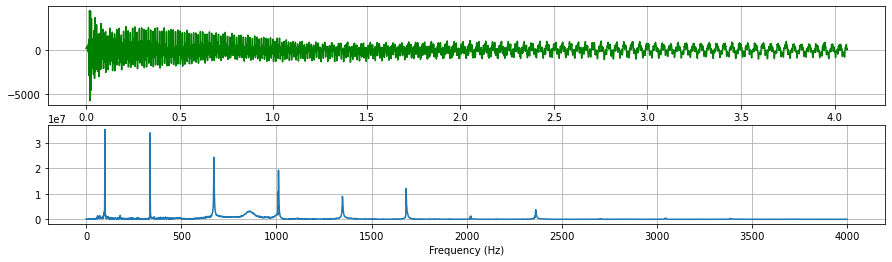

In [211]:
#gérer différences stéréo - mono, ramène tous les audios en mono
def mono_stereo(data):
    if len(data.shape) == 2 :
        data_c = np.zeros((data.shape[0], 1))
        data_c = (data[:,0]+data[:,1])/2
        return data_c
    return data

#chargement et affichage du signal temporel et du module de son spectre
samplerate, data = wavfile.read('./data/wav/Mi1/Mi15.wav')
length = data.shape[0]/samplerate
time = np.linspace(0., length, data.shape[0])

fig1 = plt.figure(1, figsize=(15, 4))

plt.subplot(2,1,1), plt.grid(), plt.xlabel("Time (s)"), plt.plot(time, data[:], 'g')

y = fft(data[:])
y = y[0: int(len(y)/2)]
mod_fft_y = abs(y)
plt.subplot(2,1,2), plt.grid(), plt.plot(mod_fft_y[0:4000]), plt.xlabel('Frequency (Hz)')
            
#recuperation des harmoniques
def harmonique(nb_hamrmonique=nb_harm_considered, mod_fft=np.array([])):
    range_electrical_frequency_system = [k for k in range(40, 70)] #intervalle pour lequel les fréquences du réseau apparaissent
    list_harmonique = np.zeros((2,nb_hamrmonique))
    for k in range(nb_hamrmonique):
        if np.argmax(mod_fft) in range_electrical_frequency_system:  
            mod_fft[np.argmax(mod_fft)-40:np.argmax(mod_fft)+40] = 0 #supprime les fréquences dues au réseau, ne représente pas d'info pour le traitement
        list_harmonique[0,k] = np.argmax(mod_fft)
        list_harmonique[1,k] = np.max(mod_fft)
        mod_fft[np.argmax(mod_fft)-40:np.argmax(mod_fft)+40] = 0

    return list_harmonique

lst = harmonique(nb_harm_considered, mod_fft_y)
print(lst)

# Affichage des spectres des données pour Mi1

  0%|          | 0/10 [00:00<?, ?it/s]

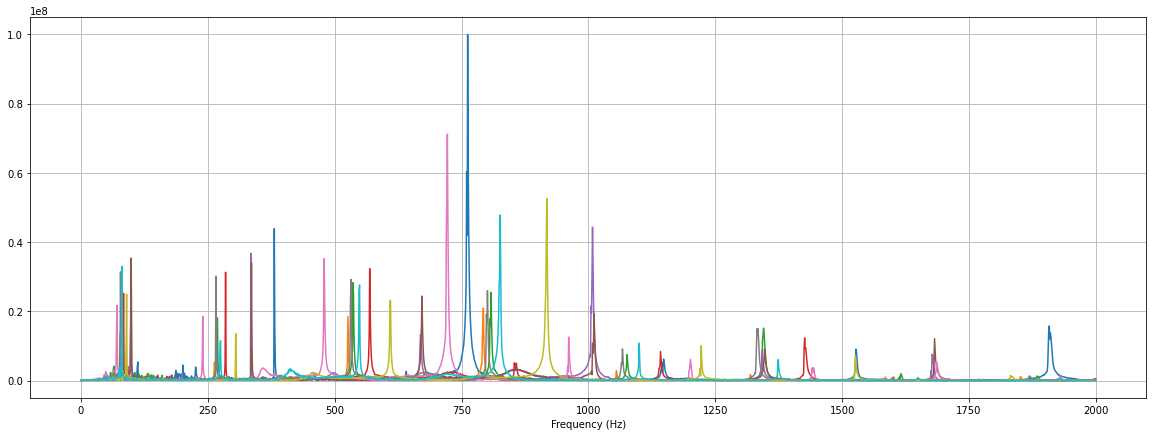

In [212]:
fig2 = plt.figure(2, figsize=(20,7))
plt.grid()
for k in tqdm(range(10)):
    k = str(k)
    path = f'./data/wav/Mi1/Mi1{k}.wav'
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    mod_fft_y = abs(fft(data))   
    plt.plot(mod_fft_y[0:2000]), plt.xlabel("Frequency (Hz)")


# Influence de la longueur du signal sur le spectre

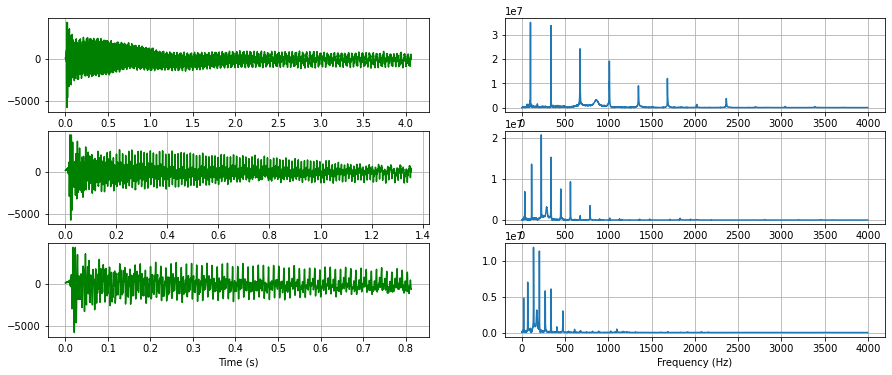

In [213]:
N=6
for k in range(1,N,2):
    samplerate, data = wavfile.read('./data/wav/Mi1/Mi15.wav')

    data = data[0:int(len(data)/k)] #permet de faire varier la longueur du signal temporelle
    
    length = data.shape[0]/samplerate
    time = np.linspace(0., length, data.shape[0])

    fig3 = plt.figure(3, figsize=(15, 10))

    plt.subplot(N-1,2,k), plt.grid(), plt.xlabel("Time (s)"), plt.plot(time, data[:], 'g')

    y = fft(data[:])
    y = y[0: int(len(y)/2)]
    mod_fft_y = abs(y)
    plt.subplot(N-1,2,k+1), plt.grid(), plt.plot(mod_fft_y[0:4000]), plt.xlabel("Frequency (Hz)")

Compression temporelle = dilatation fréquentielle et inversement. 
Il faut donc égaliser les longueurs des signaux temporels pour permettre une comparaison pertinente.

  0%|          | 0/10 [00:00<?, ?it/s]

load ./data/wav/Fa1/Fa10.wav
load ./data/wav/Fa1/Fa11.wav
load ./data/wav/Fa1/Fa12.wav
load ./data/wav/Fa1/Fa13.wav
load ./data/wav/Fa1/Fa14.wav
load ./data/wav/Fa1/Fa15.wav
load ./data/wav/Fa1/Fa16.wav
load ./data/wav/Fa1/Fa17.wav
load ./data/wav/Fa1/Fa18.wav
load ./data/wav/Fa1/Fa19.wav


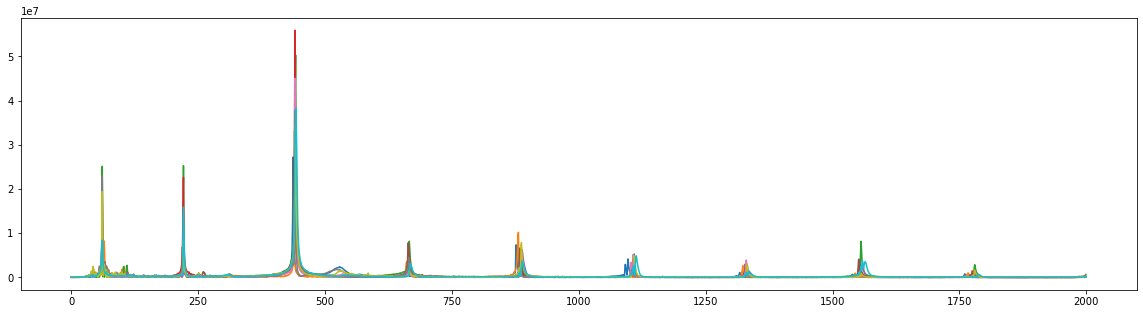

In [214]:
#On prendra tmax = 2.5 s.
#Tous les signaux temporels auront une durée de 2.51 (epsilon=0.01)
for k in tqdm(range(10)):
    k = str(k)
    path = f'./data/wav/Fa1/Fa1{k}.wav'
    print('load', path)
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    
    length = data.shape[0]/samplerate
    eps = 0.01
    real_length = 2.5
    while abs(length-real_length)>eps:
        data[-1]
        data = np.delete(data, -1)
        length = data.shape[0]/samplerate
    mod_fft_y = abs(fft(data))
    
    fig4 = plt.figure(4, figsize=(20,5)), plt.grid()
    
    plt.plot(mod_fft_y[0:2000])
    lst = harmonique(nb_harm_considered, abs(fft(data)))


# Chargement des données

In [215]:
#calcul du module de la fft de note 'note' et de la donnée 'i'.
#On peut également donner directement le chemin du fichier contantant le signal temporel.
def load_fft(note='Mi', i=0, path=''):
    if path == '':
        path = f'./data/wav/{note}/{note}{str(i)}.wav'
    samplerate, data = wavfile.read(path)
    data = mono_stereo(data)
    length = data.shape[0]/samplerate
    eps = 0.01
    real_length = 2.5
    while abs(length-real_length)>eps:
        data[-1]
        data = np.delete(data, -1)    
        length = data.shape[0]/samplerate
    return abs(fft(data)[:int(len(fft(data))/2)]) 

#charge la liste des harmoniques 
def load_data():
    lst_harm = []
    lst_notes = ['Mi1','Fa1','Fa#1','Sol1','Sol#1','La1','La#1','Si1','Do2','Do#2','Re2','Re#2']
    for i in tqdm(range(12)):
        for j in range(10):
            lst_harm.append(harmonique(nb_harm_considered,load_fft(lst_notes[i], j)))
    for k in range(len(lst_harm)):
        lst_harm = np.array(lst_harm)
        lst_harm[k,0,:] = np.sort(lst_harm[k,0,:])
    return lst_harm

lst_harmoniques = load_data()
np.save('lst_harmoniques', lst_harmoniques) #enregistrement pour ne pas avoir à executer le code à chaque fois.


  0%|          | 0/12 [00:00<?, ?it/s]

# Affichage des spectres des notes allant de Mi1 à Ré#2

  0%|          | 0/12 [00:00<?, ?it/s]

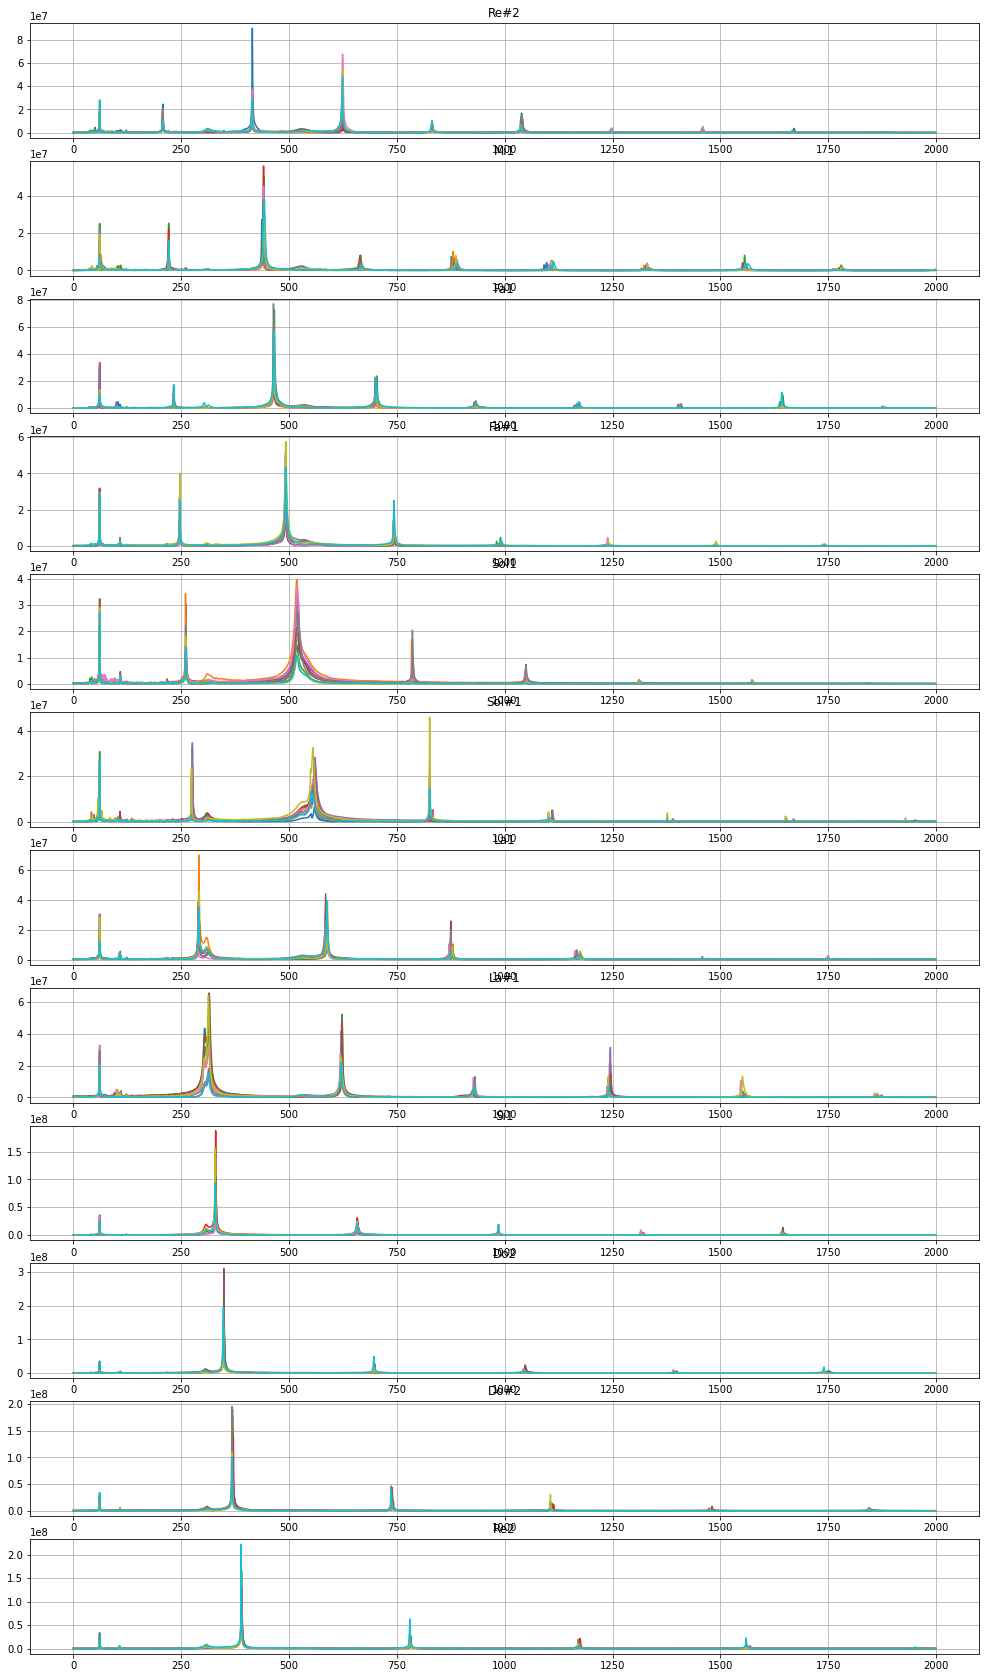

In [216]:
def display_spectres(note):
    for k in range(10):
        mod_fft_y = load_fft(note, k)
        plt.plot(mod_fft_y[0:2000])

for i in tqdm(range(len(lst_notes))):
    fig6 = plt.figure(6, figsize=(17,30))
    plt.subplot(len(lst_notes), 1, i+1), plt.title(lst_notes[i-1]), plt.grid()
    display_spectres(lst_notes[i])

On peut noter la récurrence du pic aux alentours de 50/60 Hz qui correspond à la fréquence du réseau électrique lors de l'enregistrement (lumière, appareils électrique, ...). Ces fréquences ne sont pas utiles au traitement, elles sont donc ignorées lors de l'appel de la fonction harmonique().

# kNN from scratch

In [217]:
labels = np.zeros((1,120))
for k in range(12) : labels[0,k*10:(k*10)+10] = k
np.save('labels', labels)

#calcule la distance euclidienne entre deux vecteurs
def dist_eucl(x,y):
    s=0
    for i in range(len(x)): s+=(x[i]-y[i])**2
    return np.sqrt(s)


def knn(k, lst_harm, labels, x):
    lst_min_indices, lst_dist = [], []

    for j in range(len(lst_harm)):
        lst_harm = np.array(lst_harm)
        lst_harm[j,0,:] = np.sort(lst_harm[j,0,:])
        lst_dist.append(dist_eucl(x, lst_harm[j,0,:]))

    for i in range(k):
        m = np.argmin(lst_dist)
        lst_dist[np.argmin(lst_dist)] = np.max(lst_dist)
        lst_min_indices.append(labels[0,m])
    l = np.array(Counter(lst_min_indices).most_common())

    return lst_min_indices, int(l[0][0])
        

#exemple du fonctionnement de knn()
path = f'./data/wav/Fa1/Fa12.wav'
mod_fft_y = load_fft('Sol1', 1)

x = harmonique(nb_harm_considered, mod_fft_y)
x = np.sort(x[0])
print(lst_harmoniques.shape)
print(knn(n_neigbhors, lst_harmoniques, labels, x))

(120, 2, 5)
([3.0, 5.0, 5.0, 5.0], 5)


In [218]:
#précision

t = 0 #compteur incrémenté si le résultat attendu est correct

for i in tqdm(range(12)):
    for j in range(10):
        mod_fft_y = load_fft(lst_notes[i], j)
        
        x = harmonique(nb_harm_considered, mod_fft_y)
        x = np.sort(x[0])
        
        lm, res = knn(n_neigbhors, lst_harmoniques, labels, x)
        if res == labels[0,i*10]:
            t += 1

print('précsion =', (t/120)*100, '%')

  0%|          | 0/12 [00:00<?, ?it/s]

précsion = 81.66666666666667 %


# enregistrement

In [219]:
def record(filename):
    chunk = 1024
    sample_format = pyaudio.paInt16
    channels = 1
    fs = 44100
    seconds = 2.51

    p = pyaudio.PyAudio()

    tm.sleep(1)
    
    print('Recording')

    stream = p.open(format=sample_format,
                    channels=channels,
                    rate=fs,
                    frames_per_buffer=chunk,
                    input=True)

    frames = []

    for i in range(0, int(fs / chunk * seconds)):
        data = stream.read(chunk)
        frames.append(data)

    stream.stop_stream()
    stream.close()

    p.terminate()

    print('Finished recording')


    wf = wave.open(filename, 'wb')
    wf.setnchannels(channels)
    wf.setsampwidth(p.get_sample_size(sample_format))
    wf.setframerate(fs)
    wf.writeframes(b''.join(frames))
    wf.close()

record("out1.wav")
tm.sleep(1)
os.remove("out1.wav")


Recording
Finished recording


# Test avec note enregistrée

Recording
Finished recording
[8.0, 10.0, 9.0, 9.0] 
la note jouée est : Do#2


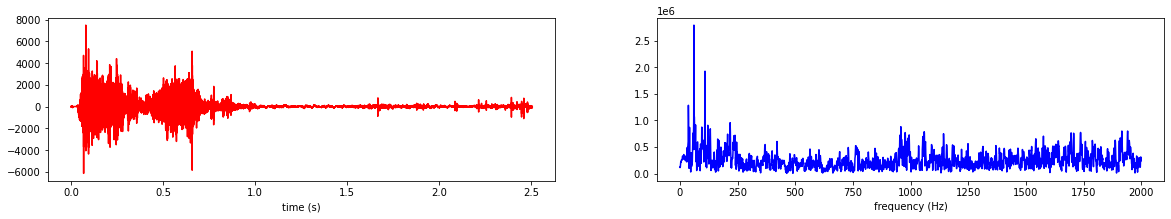

In [220]:
record("output.wav")

samplerate, data = wavfile.read('output.wav')
length = data.shape[0]/samplerate
time = np.linspace(0., length, data.shape[0])

fig1 = plt.figure(1, figsize=(20, 3))
plt.subplot(1,2,1), plt.plot(time, data, 'r'), plt.xlabel('time (s)')


mod_fft_y = load_fft(path='output.wav')
        
x = harmonique(nb_harm_considered, mod_fft_y)
x = np.sort(x[0])

lm, res = knn(4, lst_harmoniques, labels, x)

plt.subplot(1,2,2), plt.plot(load_fft(path='output.wav')[:2000], 'b'), plt.xlabel('frequency (Hz)')

print(
    lm,
    '\nla note jouée est :', lst_notes[res]
)

os.remove('output.wav')

# KNN scikit-learn

[1.0, 0.8833333333333333, 0.7833333333333333, 0.6916666666666667, 0.6, 0.525, 0.5083333333333333, 0.4583333333333333, 0.44166666666666665]


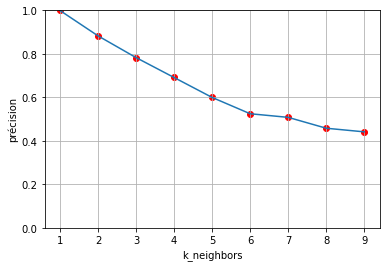

In [225]:
lst_harmoniques = np.load('lst_harmoniques.npy')
labels = np.load('labels.npy')
lst_harmoniques_scikit_knn = lst_harmoniques[:,0,:]
labels_scikit_knn = labels[0]

model = KNeighborsClassifier(n_neighbors=4)
model.fit(lst_harmoniques_scikit_knn, labels_scikit_knn)
model.score(lst_harmoniques_scikit_knn, labels_scikit_knn)

score, y = [], []
for k in range(1,10):
    y.append(k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(lst_harmoniques_scikit_knn, labels_scikit_knn)
    model.score(lst_harmoniques_scikit_knn, labels_scikit_knn)
    score.append(model.score(lst_harmoniques_scikit_knn, labels_scikit_knn))
plt.plot(y, score), plt.xlabel('k_neighbors'), plt.ylabel('précision'), plt.grid()
plt.scatter(y, score, color='r')
plt.ylim(0,1)
print(score)

# comparaison

  0%|          | 0/9 [00:00<?, ?it/s]

précsion = 100.0 %
précsion = 100.0 %
précsion = 85.83333333333333 %
précsion = 81.66666666666667 %
précsion = 65.83333333333333 %
précsion = 65.83333333333333 %
précsion = 54.166666666666664 %
précsion = 53.333333333333336 %
précsion = 50.0 %


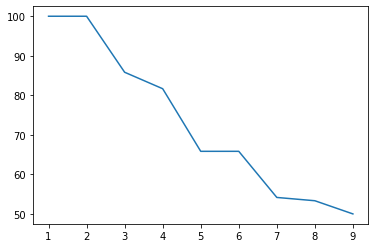

In [226]:
score_mine = []
for k in tqdm(range(1,10)):
    t = 0 #compteur incrémenté si le résultat attendu est correct
    for i in range(12):
        for j in range(10):
            mod_fft_y = load_fft(lst_notes[i], j)
            x = harmonique(nb_harm_considered, mod_fft_y)
            x = np.sort(x[0])
            lm, res = knn(k, lst_harmoniques, labels, x)
            if res == labels[0,i*10]:
                t += 1
    score_mine.append((t/120)*100)
    print('précsion =', (t/120)*100, '%')


[100.0, 100.0, 85.83333333333333, 81.66666666666667, 65.83333333333333, 65.83333333333333, 54.166666666666664, 53.333333333333336, 50.0]


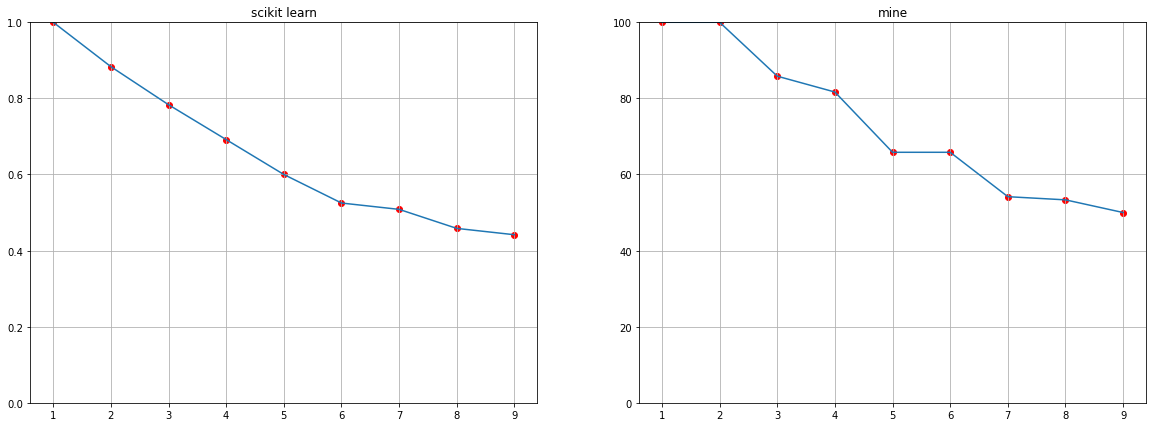

In [243]:
plt.figure(1, figsize=(20,7))

plt.subplot(1,2,1), plt.grid(), plt.ylim(0,1)
plt.plot(y, score)
plt.scatter(y, score, color='r')
plt.title('scikit learn')

plt.subplot(1,2,2), plt.grid(), plt.ylim(0,100) 
plt.plot(y, score_mine)
plt.scatter(y, score_mine, color='r')
plt.title('mine')
print(score_mine)


# Spectrogramme

array([[1.2426497e-03, 9.8587535e-03, 7.1896298e-05, ..., 1.1000114e-03,
        6.8393173e-03, 1.0356613e-03],
       [6.8558445e-03, 7.9261735e-02, 9.2010433e-03, ..., 3.9226380e-03,
        2.8368863e-01, 3.4304172e-02],
       [8.0664484e-03, 5.5365112e-02, 2.7437455e-03, ..., 4.1128330e-02,
        2.4971114e-01, 1.4053036e-01],
       ...,
       [1.7561542e-06, 1.5488006e-06, 1.7465903e-06, ..., 2.7376177e-06,
        1.4430643e-07, 1.6983313e-08],
       [5.0936666e-07, 2.6964136e-07, 1.7414467e-06, ..., 6.5702011e-08,
        1.5180430e-07, 2.2583415e-06],
       [1.3984631e-07, 1.8419995e-07, 1.4047630e-07, ..., 6.0516015e-07,
        1.1768256e-07, 1.2937289e-08]], dtype=float32)

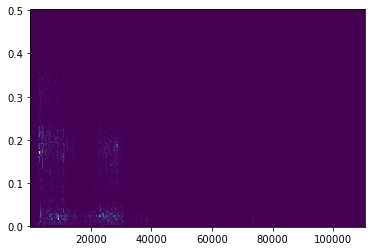

In [223]:
from sklearn.neural_network import MLPClassifier

from scipy.signal import spectrogram

f, t, Sxx = spectrogram(data)
ma = np.max(Sxx)
Sxx = (Sxx/ma)*255
plt.pcolormesh(t, f, Sxx*100)

Sxx